In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv("C://Users//mvish//Desktop//Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<function matplotlib.pyplot.show(close=None, block=None)>

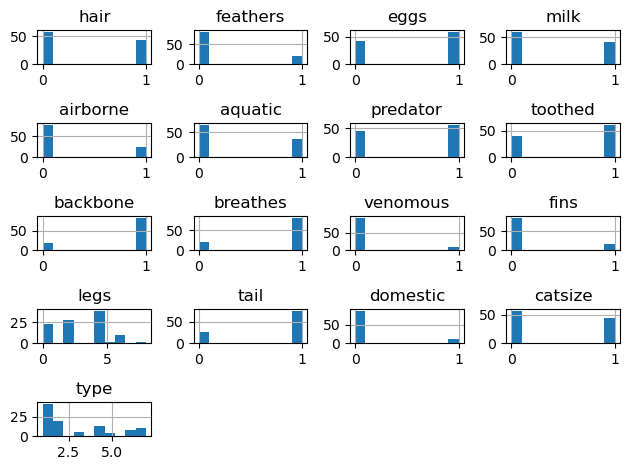

In [59]:
data.hist()
plt.tight_layout()
plt.show

C:\Users\mvish\AppData\Local\Temp\ipykernel_19584\942908928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

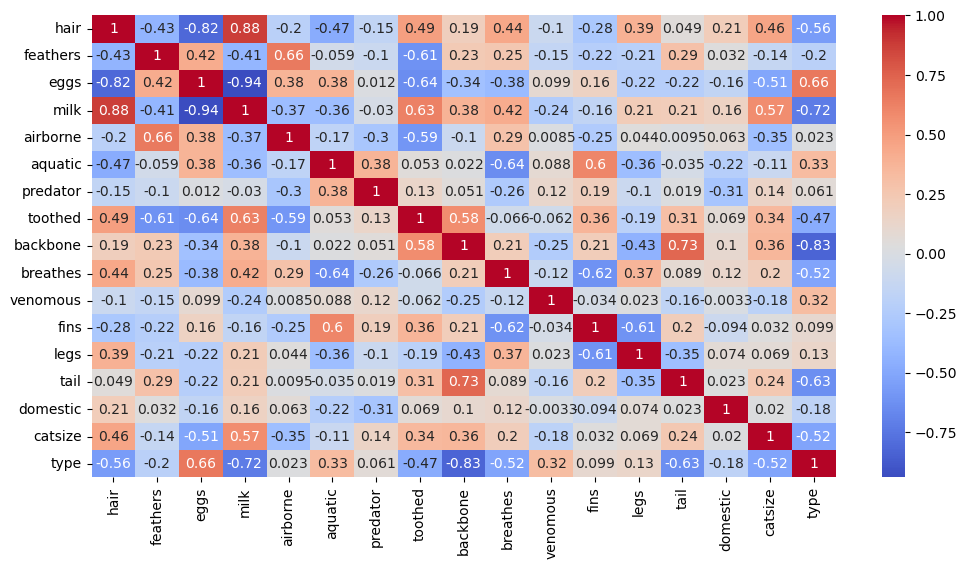

In [60]:
plt.figure(figsize=(12,6))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
correlation_matrix
plt.figure

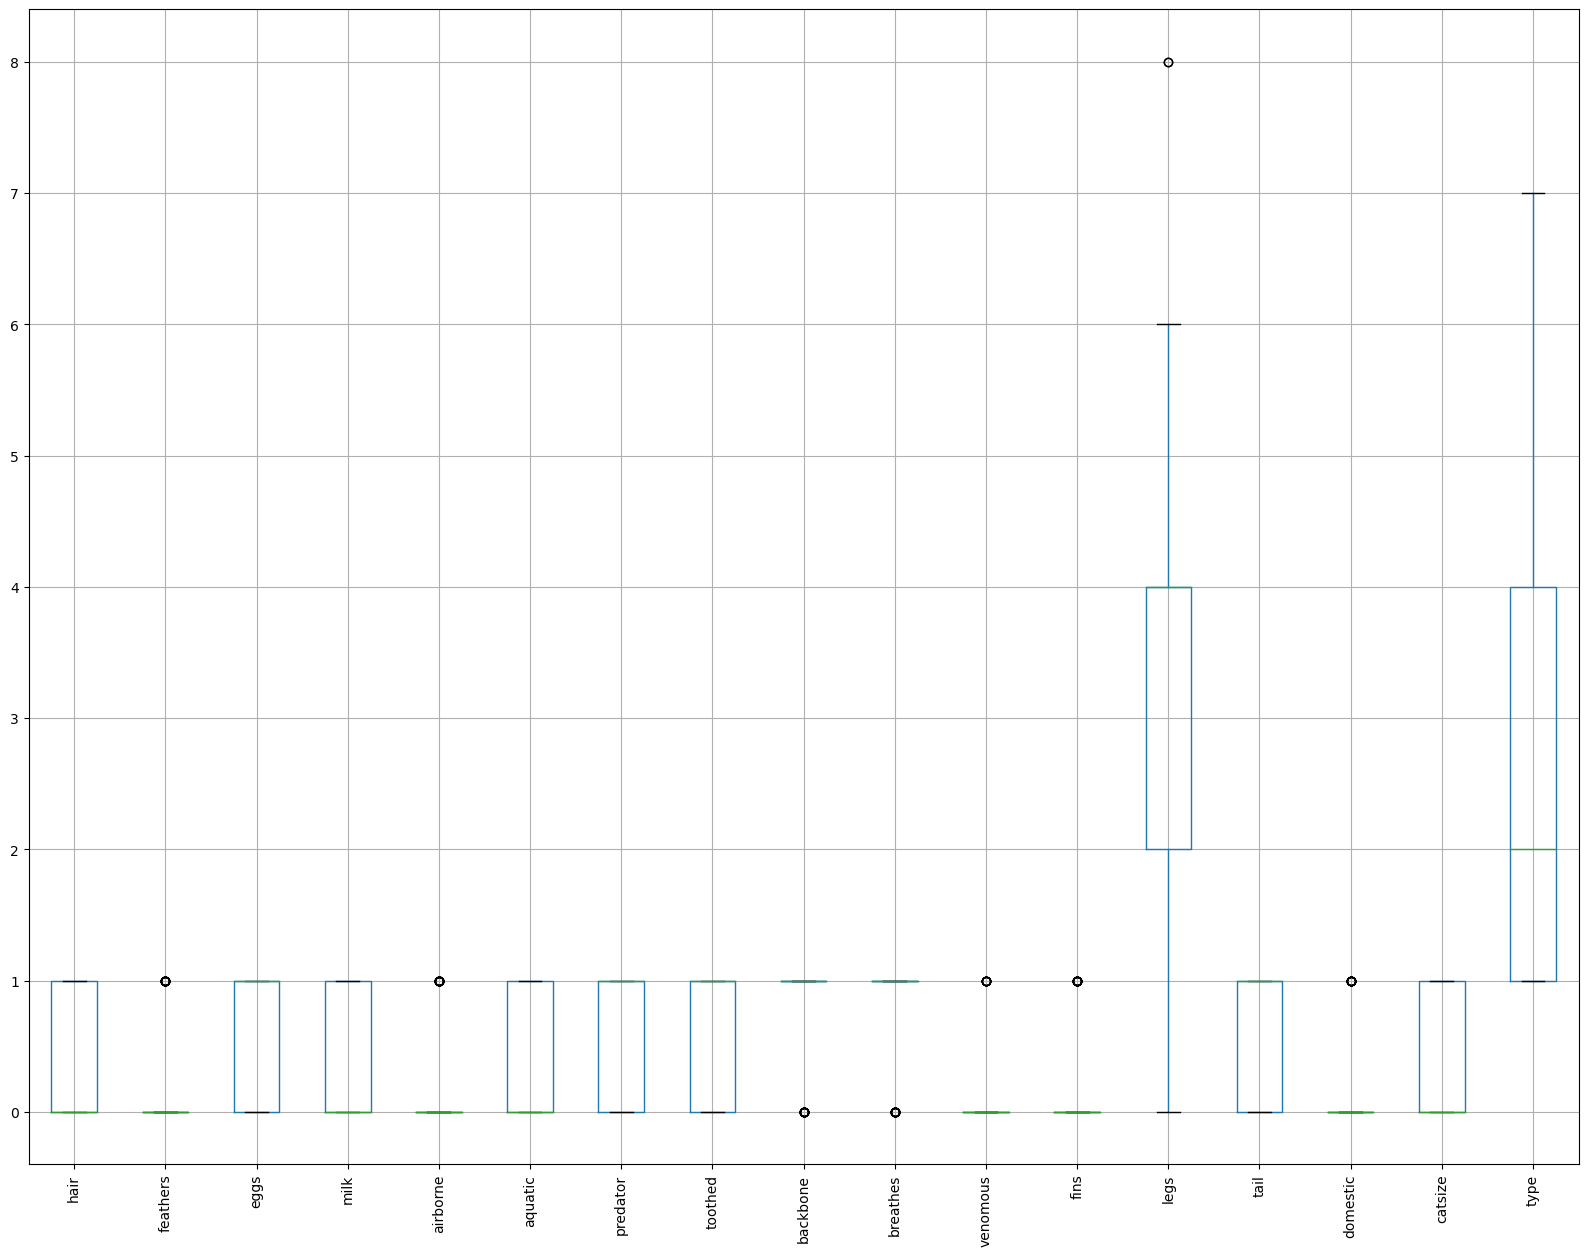

In [61]:
plt.figure(figsize=(20, 15))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [5]:
print(data.head())  # Display first few rows of the dataset
print(data.info())  # Display information about the dataset

# Step 4: Handling missing values
# Check for missing values
print(data.isnull().sum())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

In [40]:
x = data.drop('type', axis=1)  # Features
y = data['type']  # Target variable

In [41]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
from sklearn.preprocessing import LabelEncoder
er=LabelEncoder()
er_animal_name=LabelEncoder()
x["animal names"]=er_animal_name.fit_transform(x["animal name"])
X=x.drop(["animal name"],axis=1)
X


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal names
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,3
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,95
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,96
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,97
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,98


In [46]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal names
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,88
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,25
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,41
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,69
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,15


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
k = 5  #
metric = 'euclidean'  

knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

In [53]:
y_pred = knn.predict(X_test_scaled)
y_pred


array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


C:\Users\mvish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

   
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Assuming you have only two features for visualization
X_train_vis = X_train_scaled[:, :2]
X_test_vis = X_test_scaled[:, :2]

plot_decision_boundary(X_train_vis, y_train, knn, 'KNN Decision Boundary')




ValueError: X has 2 features, but KNeighborsClassifier is expecting 17 features as input.

In [ ]:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?
